# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.075425e+01     6.775494e+00
 * time: 0.0048999786376953125
     1     2.802690e+01     4.423284e+00
 * time: 0.0224459171295166
     2     1.992476e+01     4.979444e+00
 * time: 0.04593801498413086
     3     1.375864e+01     4.225238e+00
 * time: 0.06575489044189453
     4     1.085952e+01     1.604716e+00
 * time: 0.08547592163085938
     5     1.016141e+01     2.880541e+00
 * time: 0.10085701942443848
     6     9.521113e+00     1.426521e+00
 * time: 0.11699700355529785
     7     8.921540e+00     1.241706e+00
 * time: 0.13354706764221191
     8     8.469842e+00     1.398273e+00
 * time: 0.15107393264770508
     9     8.262132e+00     9.900017e-01
 * time: 0.16812396049499512
    10     8.141947e+00     9.132763e-01
 * time: 0.18491697311401367
    11     8.084546e+00     1.235703e+00
 * time: 0.25623607635498047
    12     8.010489e+00     5.950782e-01
 * time: 0.2686269283294678
    13     7.952773e+00     5.125108e-01
 * time:

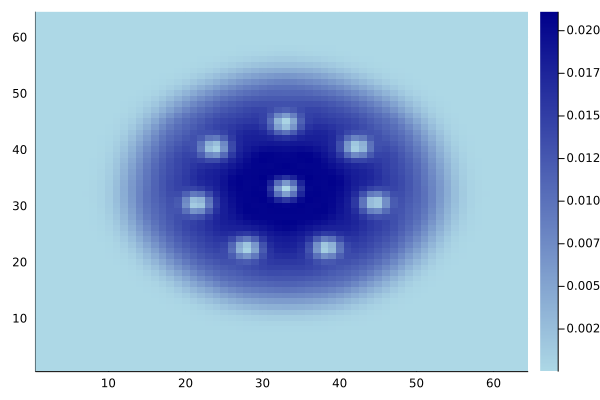

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)